<h1>Описание проекта</h1>

<h2>Задача</h2>

Сеть фитнес-центров «KD» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных.
Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. Как понять, что клиент больше не с вами? Можно записать в отток тех, кто попросил закрыть договор или удалил аккаунт. Однако клиенты не всегда уходят демонстративно: чаще перестают пользоваться сервисом тихо.
Индикаторы оттока зависят от специфики отрасли. Когда пользователь редко, но стабильно закупается в интернет-магазине — не похоже, что он «отвалился». А вот если две недели не заходит на канал с ежедневно обновляемым контентом, дела плохи: подписчик заскучал и, кажется, оставил вас.
Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал. Конечно, не исключено, что он уехал на Бали и по приезде обязательно продолжит ходить на фитнес. Однако чаще бывает наоборот. Если клиент начал новую жизнь с понедельника, немного походил в спортзал, а потом пропал — скорее всего, он не вернётся.
Чтобы бороться с оттоком, отдел по работе с клиентами «KD» перевёл в электронный вид множество клиентских анкет. Ваша задача — провести анализ и подготовить план действий по удержанию клиентов.

А именно:
научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
проанализировать основные признаки, наиболее сильно влияющие на отток;
сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:
1) выделить целевые группы клиентов;<br>
2) предложить меры по снижению оттока;<br>
3) определить другие особенности взаимодействия с клиентами.<br>

<h2>Описание данных:</h2>  

- `Churn` — факт оттока в текущем месяце;  

Текущие поля в датасете:  

Данные клиента за предыдущий до проверки факта оттока месяц:  

- `gender` — пол;  
- `Near_Location` — проживание или работа в районе, где находится фитнес-центр;  
- `Partner` — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);  
- `Promo_friends` — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);  
- `Phone` — наличие контактного телефона;  
- `Age` — возраст;  
- `Lifetime` — время с момента первого обращения в фитнес-центр (в месяцах).  

Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:  

- `Contract_period` — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год);  
- `Month_to_end_contract` — срок до окончания текущего действующего абонемента (в месяцах);  
- `Group_visits` — факт посещения групповых занятий;  
- `Avg_class_frequency_total` — средняя частота посещений в неделю за все время с начала действия абонемента;  
- `Avg_class_frequency_current_month` — средняя частота посещений в неделю за предыдущий месяц;  
- `Avg_additional_charges_total` — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон.

<hr align="center" width="80%" size="3" color="#0000dd" />

<a id='back'><a/> 
<h1>Содержание:</h1>
    
1. [Изучение данных](#1)
2. [Исследовательский анализ данных (EDA)](#2)
    * [Изучение датасета на наличие отсутствующих признаков, изучение средних значений и стандартных отклонений](#2.1)
    * [Изучение средних значений признаков в двух группах — тех, кто ушел в отток и тех, кто остался](#2.2)
    * [Построение столбчатых гистограмм и распределение признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)](#2.3)
    * [Построение и визуализация матрицы корреляций](#2.4) 
3. [Построение модели прогнозирования оттока клиентов](#3)
    * [Разобъём данные на обучающую и валидационную выборку](#3.1)
    * [Обучение модели на train-выборке двумя способами: логистической регрессией, случайным лесом.](#3.2)   
4. [Кластеризация клиентов](#4)
    * [Стандартизация данных](#4.1)
    * [Построение матрицы расстояний, на стандартизованной матрице признаков и отображение дендрограммы. Предположение о том, какое количество кластеров можно выделить](#4.2)
    * [Обучение модели кластеризации на основании алгоритма K-Means и прогноз кластеров клиентов.](#4.3)
    * [Изучение средних значений признаков для кластеров](#4.4)
    * [Распределение признаков для кластеров](#4.5)
    * [Доля оттока в разрезе кластеров. Отличия](#4.6) 
5. [Общие выводы и базовые рекомендации по работе с клиентами](#5)    

<hr align="center" width="80%" size="3" color="#0000dd" />

<a id='1'><a/> 
## 1. Изучение данных
[Назад к оглавлению](#back)

Импортируем требуемые для работы библиотеки.

In [1]:
%autosave 30

Autosaving every 30 seconds


In [2]:
import os

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
import re

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor, GradientBoostingClassifier
#from sklearn.model_selection import RandomizedSearchCV
#from sklearn.model_selection import cross_val_score

In [3]:
#отключим предупреждения
pd.options.display.expand_frame_repr = False
import warnings
warnings.filterwarnings('ignore')

<hr align="center" width="80%" size="3" color="#0000dd" />

**Загрузка данных**

Определим функцию, которая будет устранять проблемы с загрузкой данных.

In [4]:
def read_file(file_name): 
    path1 = os.path.join('/datasets', file_name) 
    path2 = os.path.join(file_name)
    if os.path.exists(path1): 
        df = pd.read_csv(path1) 
        return df
    elif os.path.exists(path2): 
        df = pd.read_csv(path2) 
        return df
    else:
        display('File is not found')

In [5]:
raw_data = read_file('gym_churn.csv')
df = raw_data.copy()

Определим функцию для первичного знакомства с данными, где также проверим данные на явные дубликаты и пропуски.

In [6]:
def first_view(dash_visits):
    print('\033[1m' + 'Информация, включающая записи датасета:' + '\033[0m')
    display (dash_visits.sample(10)) # выведем 10 любых строк
    print('\033[1m' + 'Информация о датасете:' + '\033[0m\n')
    dash_visits.info() # получим общую информацию о датасете
    print('\033[1m' + '\nДубликатов в таблице:' + '\033[0m', dash_visits.duplicated().sum()) # проверка на явные дубликаты
    print('\033[1m' + '\nПодсчет пропусков:' + '\033[0m\n', dash_visits.isna().sum()) #проверка на пропуски

In [7]:
first_view(df)

Информация, включающая записи датасета:


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
2732,1,1,0,0,1,12,1,27,208.140775,11.0,7,2.323108,2.396562,0
2053,0,1,1,1,1,6,0,30,257.162990,6.0,2,3.276035,3.295169,0
3432,0,1,0,0,1,1,0,26,109.549299,1.0,0,1.634142,0.550881,1
1521,0,1,0,0,1,6,1,27,61.000395,6.0,2,3.173820,3.077043,0
1619,1,1,1,0,1,1,0,32,153.417215,1.0,3,3.128512,3.103099,0
1701,0,1,1,1,1,1,1,27,35.283596,1.0,3,3.226574,3.227195,0
2922,0,1,0,1,1,12,1,30,127.453471,8.0,5,3.812187,3.821159,0
1681,0,1,0,1,1,1,0,30,9.552568,1.0,2,1.353787,1.497958,0
2118,1,1,0,0,1,1,0,32,55.951046,1.0,3,0.883247,0.215302,1
1370,1,1,0,0,1,1,0,30,121.932468,1.0,3,3.058328,3.124318,0


Информация о датасете:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total       

<hr align="center" width="80%" size="3" color="#0000dd" />

Первые знакомство не выявило дублей и пропусков в данных, однако, есть места над которыми следует провести ряд манипуляций перед дальнеишим анализом:
1. Преобразовать названия столбцов к нижнему регистру
2. Изменить порядок столбцов для лучшего восприятия
3. Преобразовать тип данных для столбца `Month_to_end_contract`

<hr align="center" width="80%" size="3" color="#0000dd" />

Преобразуем названия столбцов к нижнему регистру.

In [8]:
df.columns = df.columns.str.lower()

Для более удобного восприятия датафрейма поменяем порядок столбцов таким образом, чтобы бинарные признаки были рядом, а затем шли небинарные (кроме churn).

In [9]:
df = df[
    ['gender',
     'near_location',
     'partner',
     'promo_friends',
     'phone',
     'group_visits',
     'age',
     'contract_period',
     'month_to_end_contract',
     'lifetime',
     'avg_class_frequency_total',
     'avg_class_frequency_current_month',
     'avg_additional_charges_total',
     'churn']
]

Преобразуем тип данных столбца `Month_to_end_contract` в целочисленный.

In [10]:
df.month_to_end_contract = df.month_to_end_contract.astype(np.int64)

<hr align="center" width="80%" size="3" color="#0000dd" />

**Выводы по разделу:**

    В датафрейме 4000 строк, пропуски и дубликаты отсуствуют.
    Для удобства в дальнейшей работе преобразовали названия столбцов в единый формат, изменили порядок столбцов, преобразовали тип данных.

<hr align="center" width="80%" size="3" color="#0000dd" />

<a id='2'><a/> 
## 2. Исследовательский анализ данных (EDA)
[Назад к оглавлению](#back)

<hr align="center" width="80%" size="3" color="#0000dd" />

<a id='2.1'><a/> 
### 2.1 Изучение датасета на наличие отсутствующих признаков, изучение средних значений и стандартных отклонений
[Назад к оглавлению](#back)

Применив метод `describe` изучим средние значения и стандартные отклонения.

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
near_location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000
lifetime,4000.0,3.724750,3.749267,0.000000,1.000000,3.000000,5.000000,31.000000


<hr align="center" width="80%" size="3" color="#0000dd" />

**Выводы по разделу:**
* Доля оттока - 26,5%;
* Распределение по полу примерно одинаково;
* Большинство клиентов (84,5%) живет/работает рядом с фитнес-клубом;
* Около половины клиентов являются сотрудниками партнерских организаций;
* Порядка 30% клиентов пришли по программе "Приведи друга";
* База хранит номера телефоном примерно 90% клиентов;
* Чуть более 40% клиентов посещают групповые занятия;
* Средний возраст клиентов 29 лет;
* Средняя длительность абонемента составляет 4.6 месяцев;
* Среднее время с момента первого обращения в фитнес-центр - 3.7 месяцев;
* Средний срок до окончания договора - 4.3 месяцев;
* Средняя частота посещений за все время - 1.87 раз в неделю;
* Средняя частота посещений за последний месяц - 1.76 раз в неделю;
* Суммарные выручка от допонительных услуг фитнесс-центра - 146 условных единиц на клиента.

<hr align="center" width="80%" size="3" color="#0000dd" />

<a id='2.2'><a/> 
### 2.2 Изучение средних значений признаков в двух группах — тех, кто ушел в отток и тех, кто остался
[Назад к оглавлению](#back)

Посмотрим на средние значения признаков в двух группах(тех, кто ушел в отток и тех, кто остался), сгруппировав данные методом `groupby` по интересующему нас признаку (`churn`) с применением методом аггрегации функции `mean`.

In [12]:
df.groupby('churn').agg('mean').T

churn,0,1
gender,0.510037,0.510839
near_location,0.873086,0.768143
partner,0.534195,0.355325
promo_friends,0.353522,0.183789
phone,0.903709,0.902922
group_visits,0.464103,0.268615
age,29.976523,26.989632
contract_period,5.747193,1.728558
month_to_end_contract,5.283089,1.662582
lifetime,4.711807,0.990575


<hr align="center" width="80%" size="3" color="#0000dd" />

**Вывод по разделу:**
* Распределение по полу не отличается
* Ближе живущие или работающие клиенты реже попадают в отток, что вполне логично
* Сотрудники компаний-партнеров реже перестают посещать фитнесс-клуб чем остальные клиенты
* Клиенты, пришедшие по акции "Приведи друга" в два раза реже уходят в отток
* Наличие мобильного номера клиента не отличается в группах
* Средняя длительность договора полне логично больше у оставшихся пользователей, у большей части клиентов в оттоке срок договора составляет 1 месяц (скорее это говорит о том, что чаще клиенты заключают договор на 1 месяц).
* Оставшиеся пользователи чаще ходят на групповые занятия (хотя возможно, что в отток попали те, кто еще не успел начать ходить на них)
* У групп есть разница в среднем возрасте клиентов
* Есть небольшое различие в выручке от других услуг фитнес-центра
* Оставшееся время до окончания срока действия договора логично больше у оставшихся клиентов.
* У клиентов в оттоке меньше среднее количество посещений в неделю за всё время
* Количество посещений в предыдущий месяц в два раза ниже у клиентов в оттоке

Предварительно можно сделать предположение, что в отток подают те клиенты, которые живут чаще не очень близко, пришли попробовать позаниматься в клубе, посмотреть понравится ли, взяли пробный абонемент на месяц, при этом не имея каких-либо предложений по скидкам/партнерским программам. Возможно по каким-то причинам их что-то не устроило или они нашли более выгодные и удобные варианты.

<hr align="center" width="80%" size="3" color="#0000dd" />

<a id='2.3'><a/> 
### 2.3 Построение столбчатых гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)
[Назад к оглавлению](#back)

Передадим в новые переменные `left` и `stayed` срезы основго датафрейма по признаку оттока, в первую поместим тех, кто ушёл, а во вторую тех, кто остался. Также определим переменную (`distplot_columns`) в которую поместить названия столбцов соответствующие рассматриваемых признаков.

Далее применив цикл используя библиотеку `seaborn` построим столбцатые гистограммы, содержащие сведения по обеим группам.

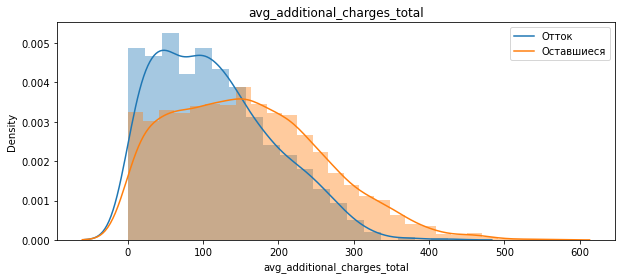

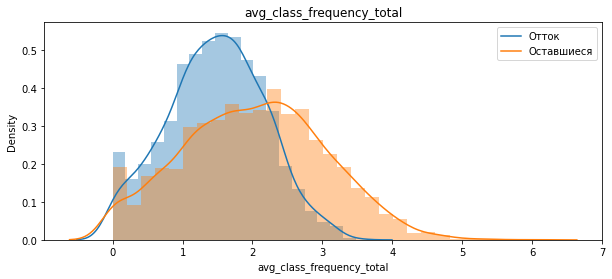

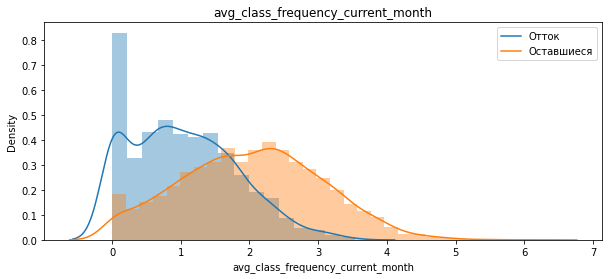

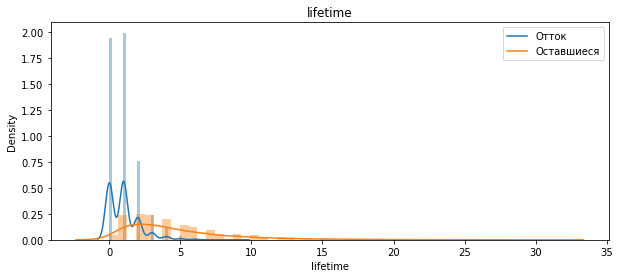

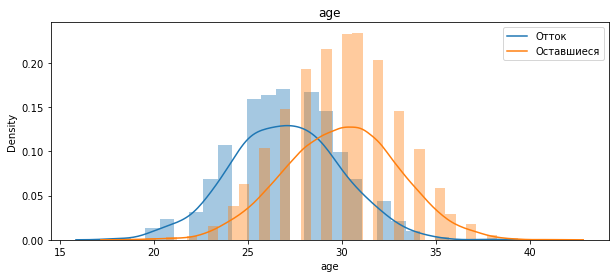

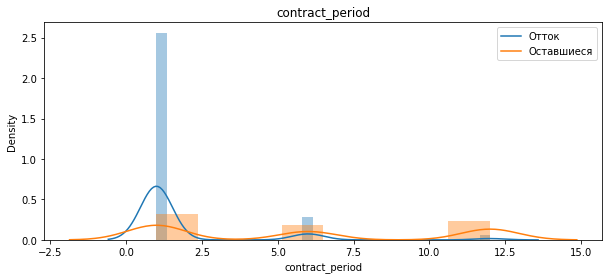

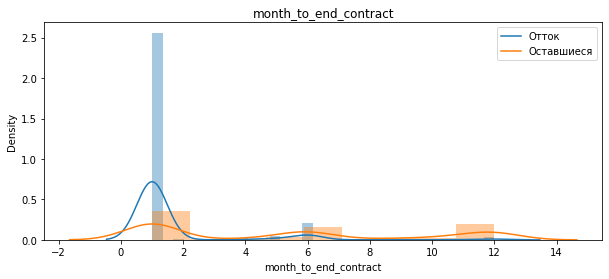

In [13]:
left = df[df['churn']==1]
stayed = df[df['churn']==0]
distplot_columns = ['avg_additional_charges_total', 'avg_class_frequency_total', 
                    'avg_class_frequency_current_month', 'lifetime', 'age', 
                    'contract_period', 'month_to_end_contract']
for column in distplot_columns: 
  plt.figure(figsize=(10,4)) 
  plt.title(column)
  sns.distplot(left[column])
  sns.distplot(stayed[column])
  plt.legend(['Отток', 'Оставшиеся'])
  plt.show()

Построим countplot-графики для бинарных признаков перебрав нужные нам параметры циклом.

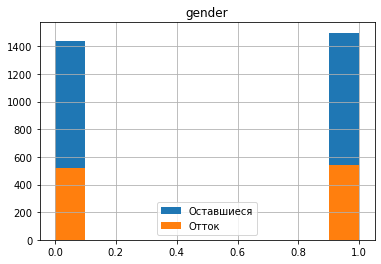

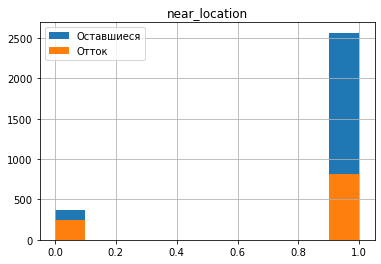

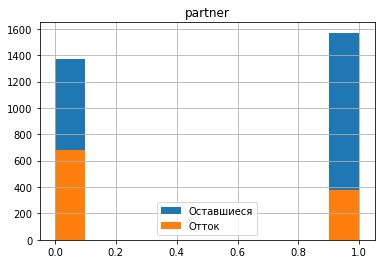

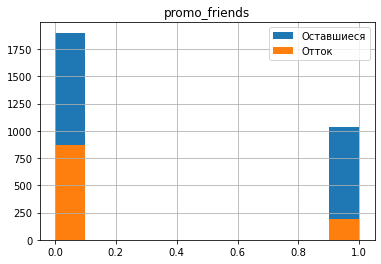

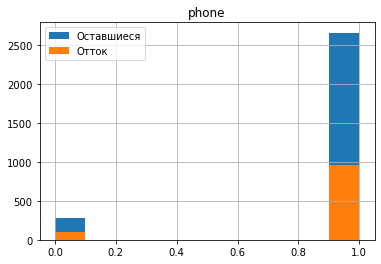

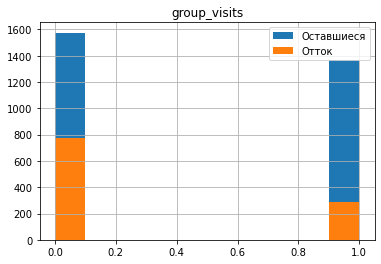

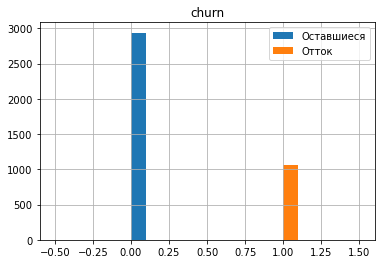

In [14]:
for column in df.columns:
  if column not in distplot_columns:
    df.groupby('churn')[column].hist()
    plt.title(column)
    plt.legend(['Оставшиеся', 'Отток'])
    plt.show()

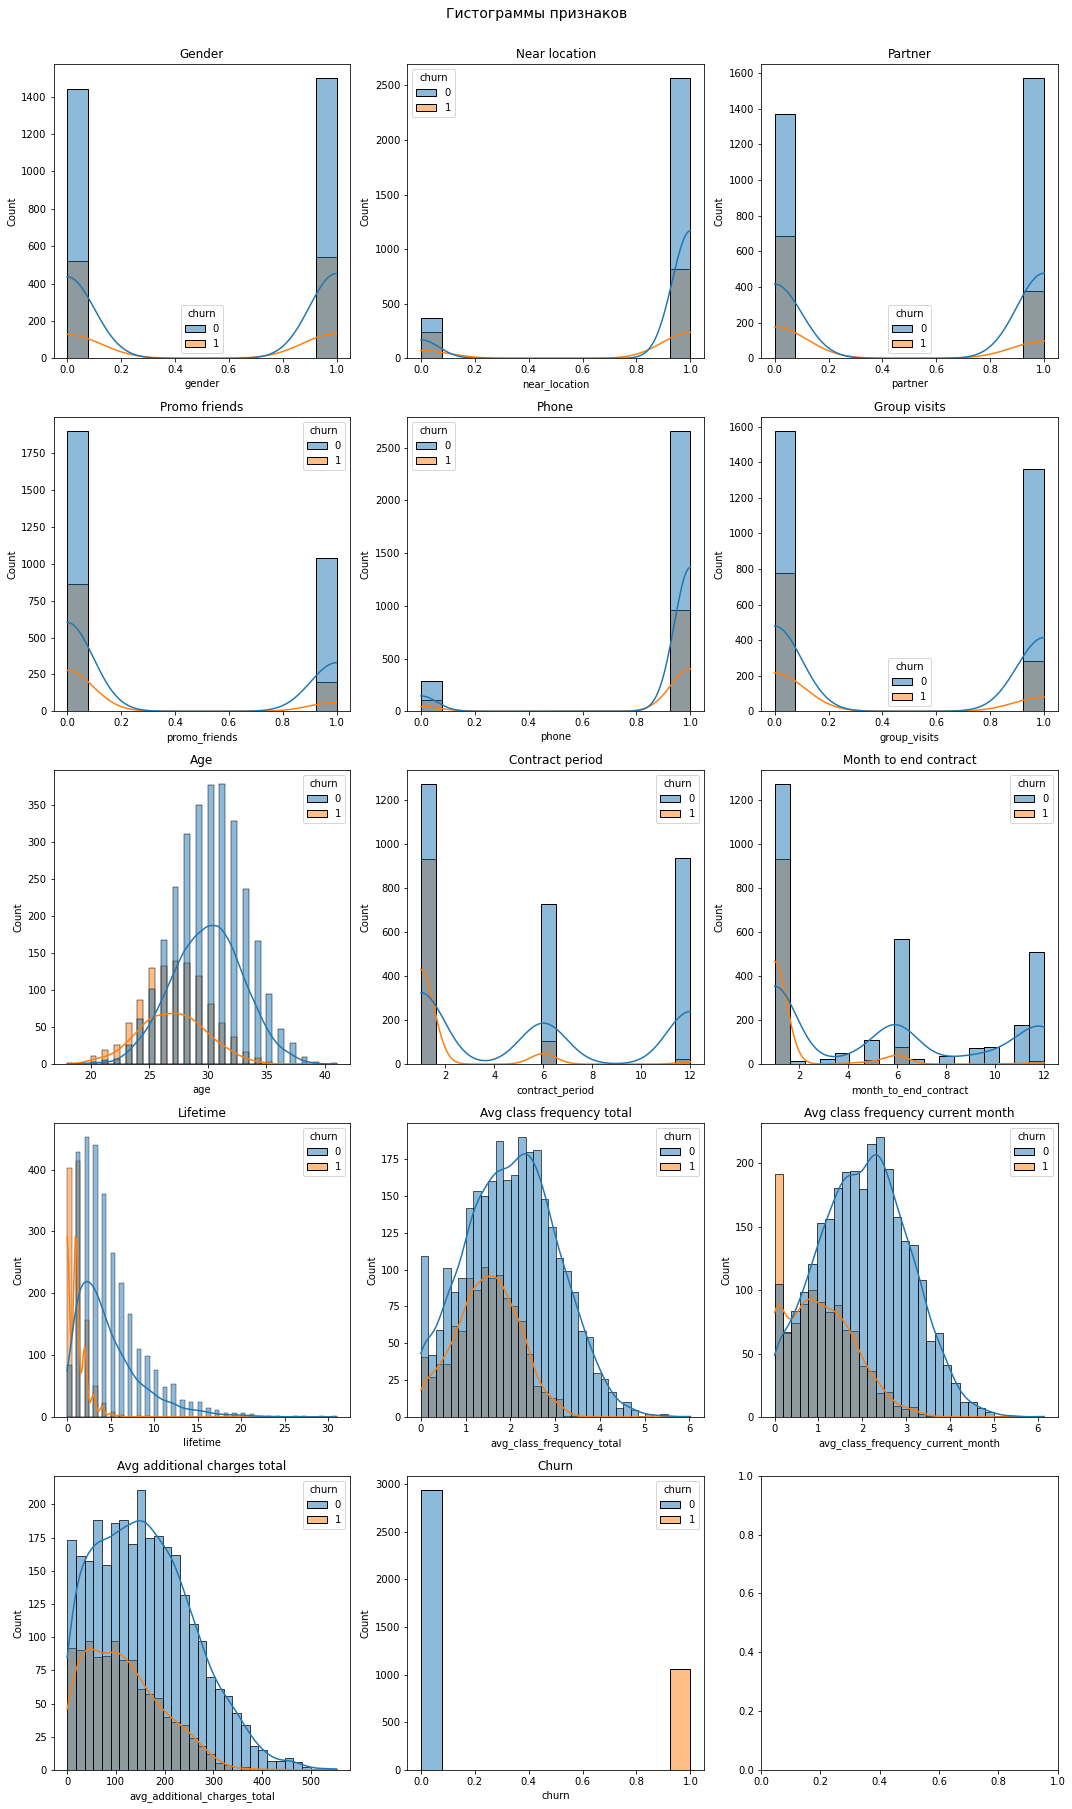

In [15]:
WIDTH = 3
plot_amount = len(df.columns)
height = plot_amount//WIDTH + 1

fig, axs = plt.subplots(height, WIDTH, figsize=(15, 25))
fig.suptitle('Гистограммы признаков',  y=1.003, size=14)

for item, ax in zip(df.columns, np.ravel(axs)):
    sns.histplot(data = df, x=item, hue='churn', ax=ax, kde=True)
    ax.set_title(item.capitalize().replace('_', ' '), size=12)

plt.tight_layout()
plt.show()

<hr align="center" width="80%" size="3" color="#0000dd" />

<a id='2.4'><a/> 
### 2.4 Построение и визуализация матрицы корреляций
[Назад к оглавлению](#back)

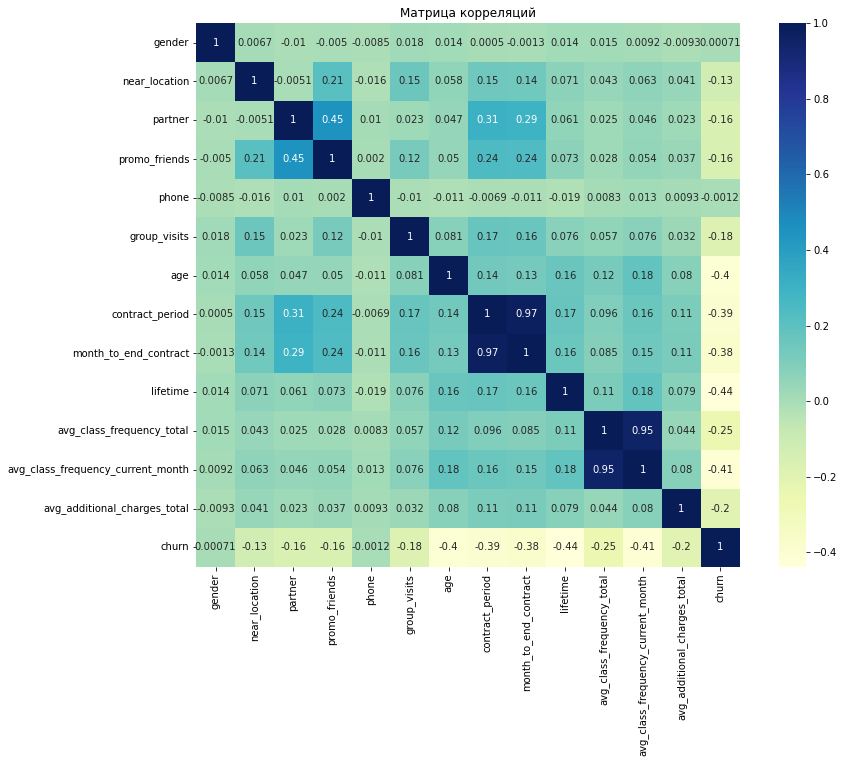

In [16]:
plt.figure(figsize=(14,10))
sns.heatmap(data = df.corr(), annot=True, square=True, cmap='YlGnBu')
plt.title('Матрица корреляций')
plt.show()

<hr align="center" width="80%" size="3" color="#0000dd" />

**Вывод:**
* Имеются мультиколлинеарные признаки - `contract_period` и `month_to_end_contract`, `avg_class_frequency_current_month` и `avg_class_frequency_total`;
* Есть признаки с нулевой корреляцией с целевой переменной, это `phone` и `gender`.

<hr align="center" width="80%" size="3" color="#0000dd" />

## Вывод  по разделу:
Средний возраст клиента 29-30 лет и возрастной признак сильно коррелирует с оттоком, в отток попадают более молодые клиенты. Так же ключевыми переменными являются: время с момента первого обращения в фитнес-центр, количество псещений в месяц, длительность текущего действующего абонемента, наличие скидок по партнерской программе или факт, что клиента пригласил друг. Похоже, что чаще всего в отток попадают клиенты, которые берут пробный абонемент на месяц, редко посещают спорт-зал, не посещают групповые занятия и которым не были предложены скидки по партнерской программе. 

<a id='3'><a/> 
## 3. Построение модели прогнозирования оттока клиентов
[Назад к оглавлению](#back)

<hr>

В связи с тем, что у нас имеется две пары мультиколлинеарных признаков (суммарно 4), попробуем преобразовать их в 2 новых признака при помощи линейных комбинаций:
 - "длительность абонемента / месяц окончания абонемента",
 - "средняя частота посещений в неделю за предыдущий месяц / средняя частота посещений в неделю за все время с начала действия абонемента". 
 
Применять будем вычитание.

Поместим копию исходного датафрейма в новую переменную (`df_for_models`). Далее создадим новые столбцы (`attribute_1`/`attribute_1`) путём вычитания признаков друг из друга из ранее определенных пар, а тажкже удалим столбцы пар.

In [17]:
df_for_models = df.copy()

#создадим столбцы с новыми признаками
df_for_models['attribute_1'] = df['month_to_end_contract'] - df['contract_period']
df_for_models['attribute_2'] = df['avg_class_frequency_total'] - df['avg_class_frequency_current_month']

#удалим столбцы со старыми признаками
df_for_models = df.drop(['month_to_end_contract', 'contract_period', 'avg_class_frequency_total', 'avg_class_frequency_current_month'], axis=1)

<hr align="center" width="80%" size="3" color="#0000dd" />

<a id='3.1'><a/> 
## 3.1. Разобъём данные на обучающую и валидационную выборку
[Назад к оглавлению](#back)

Для разделения выборки применим функцию `train_test_split`.

In [18]:
X = df_for_models.drop('churn', axis = 1)
y = df_for_models['churn']

<hr align="center" width="80%" size="3" color="#0000dd" />

<a id='3.2'><a/> 
### 3.2 Обучение модели на train-выборке двумя способами: логистической регрессией, случайным лесом.
[Назад к оглавлению](#back)

**Логическая регрессия**

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)
X_test_st = scaler.transform(X_test)

lr_model = LogisticRegression(random_state=0)
lr_model.fit(X_train_st, y_train)
lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test_st)[:,1]

In [20]:
print('Метрики для модели логистической регрессии:')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, lr_predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, lr_predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, lr_predictions)))
print('F1: {:.2f}'.format(f1_score(y_test, lr_predictions)))

Метрики для модели логистической регрессии:
Accuracy: 0.88
Precision: 0.79
Recall: 0.73
F1: 0.76


In [21]:
features = pd.DataFrame(lr_model.coef_.T, X.columns).reset_index()
features.columns = ['feature', 'coef']
features['coef'] = features['coef'].apply(lambda x: abs(x))
features = features.sort_values(by='coef', ascending=False)

print('\nКоэффициенты признаков в оптимальной функции логистической регрессии:')
print(features)


Коэффициенты признаков в оптимальной функции логистической регрессии:
                        feature      coef
7                      lifetime  3.988493
6                           age  1.056258
8  avg_additional_charges_total  0.582964
5                  group_visits  0.415936
2                       partner  0.283009
3                 promo_friends  0.229500
1                 near_location  0.195639
4                         phone  0.070893
0                        gender  0.022972


<hr align="center" width="80%" size="3" color="#0000dd" />

**Случайный лес**

In [22]:
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0) 
rf_model.fit(X_train_st, y_train)
rf_predictions = rf_model.predict(X_test_st)
rf_probabilities = rf_model.predict_proba(X_test_st)[:,1]


In [23]:
print('\nМетрики для модели случайного леса:')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, rf_predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, rf_predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, rf_predictions)))
print('F1: {:.2f}'.format(f1_score(y_test, rf_predictions)))


Метрики для модели случайного леса:
Accuracy: 0.85
Precision: 0.71
Recall: 0.69
F1: 0.70


**Выводы:**
* Доля правильных прогнозов и полнота чуть выше в модели логистической регрессии
* Таким образом, модель логистической регрессии показала себя лучше.

<hr align="center" width="80%" size="3" color="#0000dd" />

<a id='4'><a/> 
## 4. Кластеризация клиентов
[Назад к оглавлению](#back)

Проведем кластеризацию пользователей без столбца целевого значения
  * Стандартизируем данные 
  * Построим матрицу расстояний функцией linkage() на стандартизированной матрице признаков и нарисуем дендограмму. Предположим, какое количество кластеров можем выделить.
  * Обучим модель кластеризации на основе алгоритма K-Means и спрогнозируем кластеры клиентов. (берём n=5 кластеров)

In [24]:
df_sс = df.drop(['churn'], axis=1)
df_columns_list = df_sс.columns

<hr align="center" width="80%" size="3" color="#0000dd" />

<a id='4.1'><a/> 
## 4.1 Стандартизация данных
[Назад к оглавлению](#back)

In [25]:
df_sс = StandardScaler().fit_transform(df_sс)
df_sс = pd.DataFrame(df_sс, columns = df_columns_list).astype('float64')

<hr align="center" width="80%" size="3" color="#0000dd" />

<a id='4.2'><a/> 
## 4.2 Построение матрицы расстояний, на стандартизованной матрице признаков и отображение дендрограммы. Предположение о том, какое количество кластеров можно выделить
[Назад к оглавлению](#back)

In [26]:
linked = linkage(df_sс, method = 'ward')

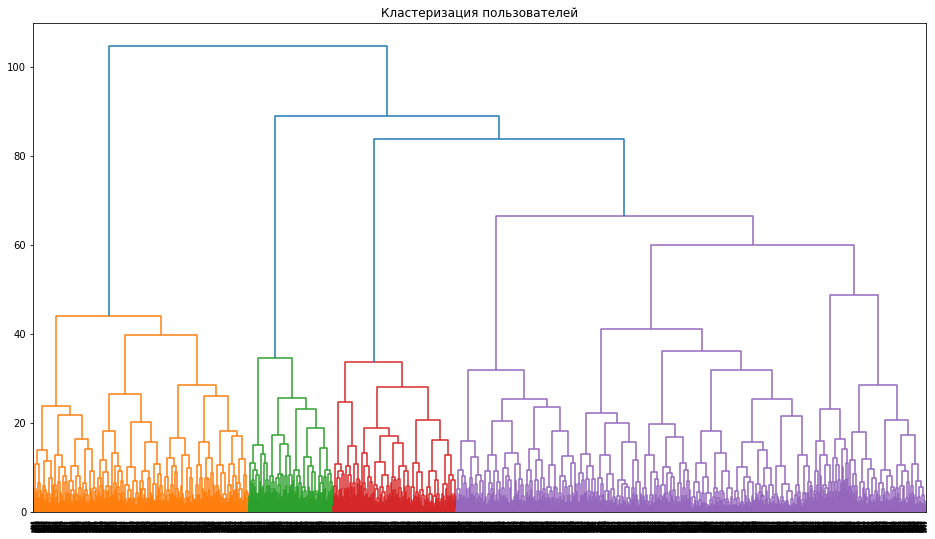

In [27]:
plt.figure(figsize=(16, 9))  
dendrogram(linked, orientation = 'top')
plt.title('Кластеризация пользователей')
plt.show()

Исходя из построеной дендрограммы выделить 4-5 кластеров.

<hr align="center" width="80%" size="3" color="#0000dd" />

<a id='4.3'><a/> 
### 4.3 Обучение модели кластеризации на основании алгоритма K-Means и прогноз кластеров клиентов
[Назад к оглавлению](#back)

Условия исследования предолагают, что кластеров 5. Далее будем исходить из этого.

In [28]:
km = KMeans(n_clusters = 5, random_state = 42)
labels = km.fit_predict(df_sс)
df['cluster'] = labels

<hr align="center" width="80%" size="3" color="#0000dd" />

<a id='4.4'><a/> 
### 4.4 Изучение средних значений признаков для кластеров
[Назад к оглавлению](#back)

Изучим численность кластеров.

In [29]:
df.cluster.value_counts()

3    1227
1     889
2     865
0     633
4     386
Name: cluster, dtype: int64

Изучим средние значения признаков для кластеров

In [30]:
df.groupby('cluster').mean().T

cluster,0,1,2,3,4
gender,0.502370,0.554556,0.499422,0.485738,0.523316
near_location,0.949447,0.849269,0.937572,0.718011,0.862694
partner,0.829384,0.263217,0.737572,0.299919,0.471503
promo_friends,0.998420,0.052868,0.478613,0.018745,0.305699
phone,1.000000,1.000000,1.000000,1.000000,0.000000
group_visits,0.448657,0.436445,0.546821,0.276284,0.427461
age,29.104265,30.008999,29.905202,28.083945,29.297927
contract_period,3.097946,2.606299,11.854335,1.914425,4.777202
month_to_end_contract,2.887836,2.419573,10.812717,1.821516,4.466321
lifetime,3.772512,4.780652,4.677457,2.195599,3.940415


**Описание кластеров:**
* **Кластер 3**
  * Ёмкость - 1 227 клиентов
  * **Отток - 57% - самый высокий**
  * Живут или работают недалеко от фитнес-центра
  * В основном обладатели недолгосрочных абонементов на 1-3 месяца
  * Наименьшее кол-во посещений за всё время и в последний месяц
  * Реже всех посещают групповые занятия
* **Кластер 1**
  * Ёмкость - 889 клиентов
  * Отток - 9%
  * Живут или работают недалеко от фитнес-центра
  * **Чаще всех посещают клуб - 2.75 раз в неделю**
  * Договора НЕ на длительный срок - в  среднем 2.73 месяцев
* **Кластер 2**
  * Ёмкость - 865 клиентов
  * **Отток - 2% - самый низкий**
  * Живут или работают недалеко от фитнес-центра
  * Преобладают сотрудники компаний-партнеров - 73%
  * Заключают договора **на длительный срок - 12 месяцев**
  * Чаще всех посещают групповые занятия - 55%
  * Чаще всех пришли по промо акции
* **Кластер 0**
  * Ёмкость - 633 клиентов
  * Отток - 24%
  * Похожи на кластер 3, но живут или **работают в другом районе**
* **Кластер 4**
  * Отток - 26%
  * Живут или работают недалеко от фитнес-центра
  * **Нет мобильного номера**
  * В среднем 4.5 месяцев контракты


<hr align="center" width="80%" size="3" color="#0000dd" />

<a id='4.5'><a/> 
### 4.5 Распределение признаков для кластеров
[Назад к оглавлению](#back)

Построим countplot-графики для бинарных признаков

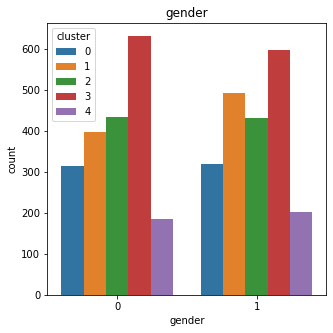

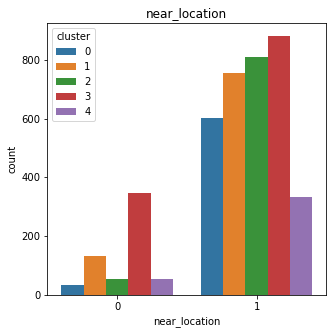

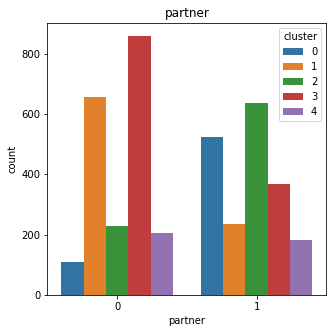

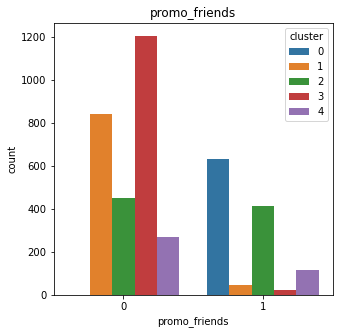

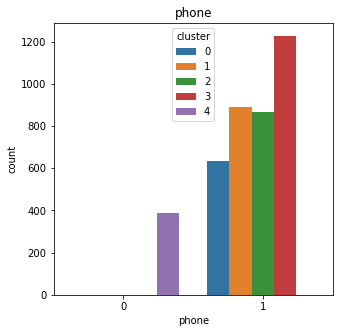

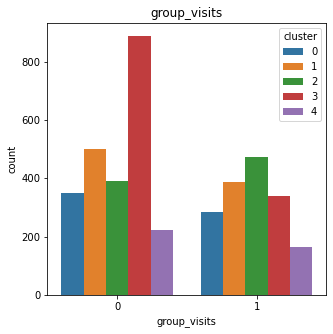

In [31]:
for column in ['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'group_visits']:
    plt.figure(figsize=(5, 5))
    sns.countplot(x = df[column], hue='cluster', data=df)
    plt.title(column)
    plt.show()

Построим kdeplot-графики для небинарных признаков

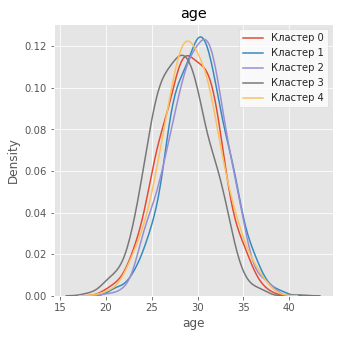

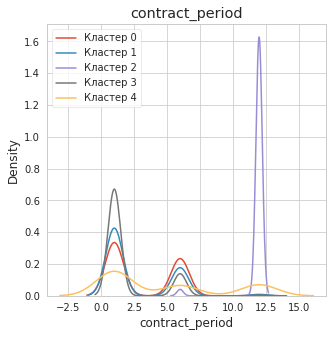

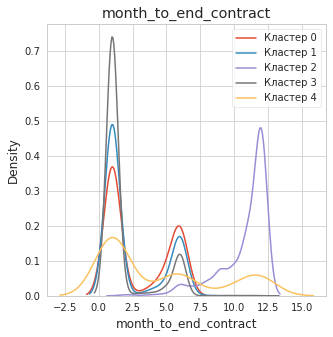

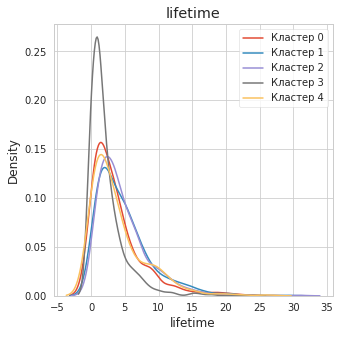

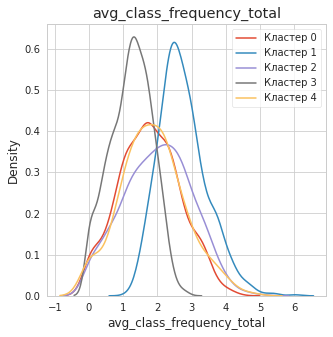

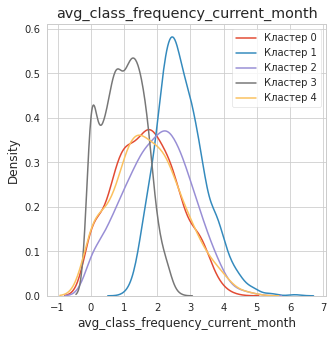

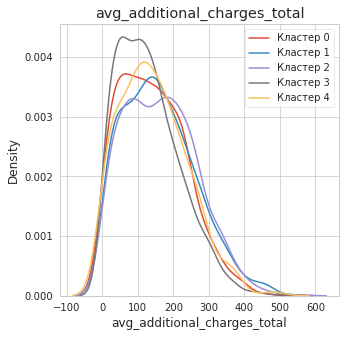

In [32]:
matplotlib.style.use('ggplot')

for column in ['age', 'contract_period', 'month_to_end_contract', 'lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month', 'avg_additional_charges_total']:
    plt.figure(figsize=(5, 5))
    plt.title(column)   
    sns.kdeplot(df.query('cluster==0')[column], label = 'Кластер 0')
    sns.kdeplot(df.query('cluster==1')[column], label = 'Кластер 1')
    sns.kdeplot(df.query('cluster==2')[column], label = 'Кластер 2')
    sns.kdeplot(df.query('cluster==3')[column], label = 'Кластер 3')
    sns.kdeplot(df.query('cluster==4')[column], label = 'Кластер 4')
    
    sns.set_style('whitegrid')
    plt.legend()
    plt.show()

<hr align="center" width="80%" size="3" color="#0000dd" />

<a id='4.6'><a/> 
### 4.6 Доля оттока в разрезе кластеров. Отличия
[Назад к оглавлению](#back)

Изучим средние значения оттока в кластерах

In [33]:
df.groupby('cluster').agg({'churn':'mean'}).sort_values(by='churn')

,churn
cluster,
2,0.021965
1,0.089989
0,0.246445
4,0.266839
3,0.572942


### Вывод  
Полученные данные подтверждают факт того, что самый большой отток в 3-м кластере - 57%, затем в 4 - 27%.  
Кластер 2 выглядит самыми усточивыми - он 3-й по численности (863 чел.), не сильно уступая позиции № 2(порядка 20 чел) и в нем наименьший отток, всего 2%.

<hr align="center" width="80%" size="3" color="#0000dd" />

<a id='5'><a/> 
## 5. Общие выводы и базовые рекомендации по работе с клиентами
[Назад к оглавлению](#back)

В ходе исследования мы построили прогнозную модель с неплохой точностью, благадоря которой мы можем провести анализ вероятности оттока в необходимом нам разрезе.

В свою очередь явных зависимостей факта оттока от одного конкретного признака из рассматриваемых не обнаружено.

**Выводы по имеющимся данным:**
* Доля оттока - 26,5%;
* Распределение по полу примерно одинаково;
* Большинство клиентов (84,5%) живет/работает рядом с фитнес-клубом;
* Около половины клиентов являются сотрудниками партнерских организаций;
* Порядка 30% клиентов пришли по программе "Приведи друга";
* База хранит номера телефоном примерно 90% клиентов;
* Чуть более 40% клиентов посещают групповые занятия;
* Средний возраст клиентов 29 лет;
* Средняя длительность абонемента составляет 4.6 месяцев;
* Среднее время с момента первого обращения в фитнес-центр - 3.7 месяцев;
* Средний срок до окончания договора - 4.3 месяцев;
* Средняя частота посещений за все время - 1.87 раз в неделю;
* Средняя частота посещений за последний месяц - 1.76 раз в неделю;
* Суммарные выручка от допонительных услуг фитнесс-центра - 146 условных единиц на клиента.


**Выводы на основе отличий признаков у клиентов, попавших в отток и оставшихся:**
* Распределение по полу не отличается
* Ближе живущие или работающие клиенты реже попадают в отток, что вполне ожидаемо,
* Сотрудники компаний-партнеров реже перестают посещать фитнесс-клуб чем остальные клиенты
* Клиенты, пришедшие по акции "Приведи друга" в два раза реже уходят
* Наличие мобильного номера клиента не отличается в группах
* Средняя длительность договора естественно больше у оставшихся пользователей, у большей части клиентов в оттоке срок договора составляет 1 месяц (скорее это говорит о том, что чаще клиенты заключают договор на 1 месяц).
* Оставшиеся пользователи чаще ходят на групповые занятия (хотя возможно, что в отток попали те, кто еще не успел начать ходить на них)
* У групп есть разница в среднем возрасте клиентов
* Есть небольшое различие в выручке от других услуг фитнес-центра
* Оставшееся время до окончания срока действия договора логично больше у оставшихся клиентов.
* У клиентов в оттоке меньше среднее количество посещений в неделю за всё время
* Количество посещений в предыдущий месяц в два раза ниже у клиентов в оттоке

Мы разбили всех наших клиентов на 5 групп, как того требовалось согласно условиям задачи. Дендограмма подтверждала наличие 4-5 кластеров.


* Как выяснилось, большинство клиентов живет или работает неподалеку от фитнес-центра.
* **Кластер 3**
  * Ёмкость - 1 227 клиентов
  * **Отток - 57% - самый высокий**
  * Живут или работают недалеко от фитнес-центра
  * В основном обладатели недолгосрочных абонементов на 1-3 месяца
  * Наименьшее кол-во посещений за всё время и в последний месяц
  * Реже всех посещают групповые занятия
* **Кластер 1**
  * Ёмкость - 889 клиентов
  * Отток - 9%
  * Живут или работают недалеко от фитнес-центра
  * **Чаще всех посещают клуб - 2.75 раз в неделю**
  * Договора НЕ на длительный срок - в  среднем 2.73 месяцев
* **Кластер 2**
  * Ёмкость - 865 клиентов
  * **Отток - 2% - самый низкий**
  * Живут или работают недалеко от фитнес-центра
  * Преобладают сотрудники компаний-партнеров - 73%
  * Заключают договора **на длительный срок - 12 месяцев**
  * Чаще всех посещают групповые занятия - 55%
  * Чаще всех пришли по промо акции
* **Кластер 0**
  * Ёмкость - 633 клиентов
  * Отток - 24%
  * Похожи на кластер 3, но живут или **работают в другом районе**
* **Кластер 4**
  * Отток - 26%
  * Живут или работают недалеко от фитнес-центра
  * **Нет мобильного номера**
  * В среднем 4.5 месяцев контракты
  
***РЕКОМЕНДАЦИИ***
  
Модель логистической регрессии на основании метрик показала себя лучше, следовательно для прогнозирования оттока клиентов лучше использовать именно ее.

На основе вышепредставленных выводов, предложены следующие рекомендации для формирования стратегии взаимодействия с пользователями сети фитнес-центров «KD», а также их удержания:

1) Расширение методов привлечения в фитнес-центр клиентов из близлежащих спальных районах;

2) Развитие новых/дополнительных каналов связи с клиентами, чтобы охватить категорию клиентов, не оставивших номер телефона;

3) Ращработка, внедрение и продвижение абонементов с более длительным сроком действия (9 и 12 месяцев), т.к. чем дольше времени до окончания абонемента, тем лояльнее клиенты;

4) Введение специальных скидок и акций по доп услугам для клиентов с длительными абонементами, т.к. они имеет склонность пользоваться доп услугами;

5) Пересмотр ценовой политики на абонименты, в частности установить ранжирование цены от срока действия;

6) Разработать системы лояльности, предусматривающие наличие скидок на продление действующих абониментов ввести, например, более выгодное продление абонемента для клиентов, покупающих абонемент сроком от 3 месяцев, т.к. подобные затраты окупятся оказываемыми доп услугами, которыми пользуются лояльные клиенты, и отменой неэффективных акций.